In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df = df.drop('id', axis = 1)
df = df.drop('Unnamed: 32', axis = 1)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df_cols = df.columns
print(len(df_cols))
print(df_cols)

31
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
# Create a LabelEncoder object
le = LabelEncoder()

df['diagnosis']= le.fit_transform(df['diagnosis'])
  
df['diagnosis'].unique()

array([1, 0])

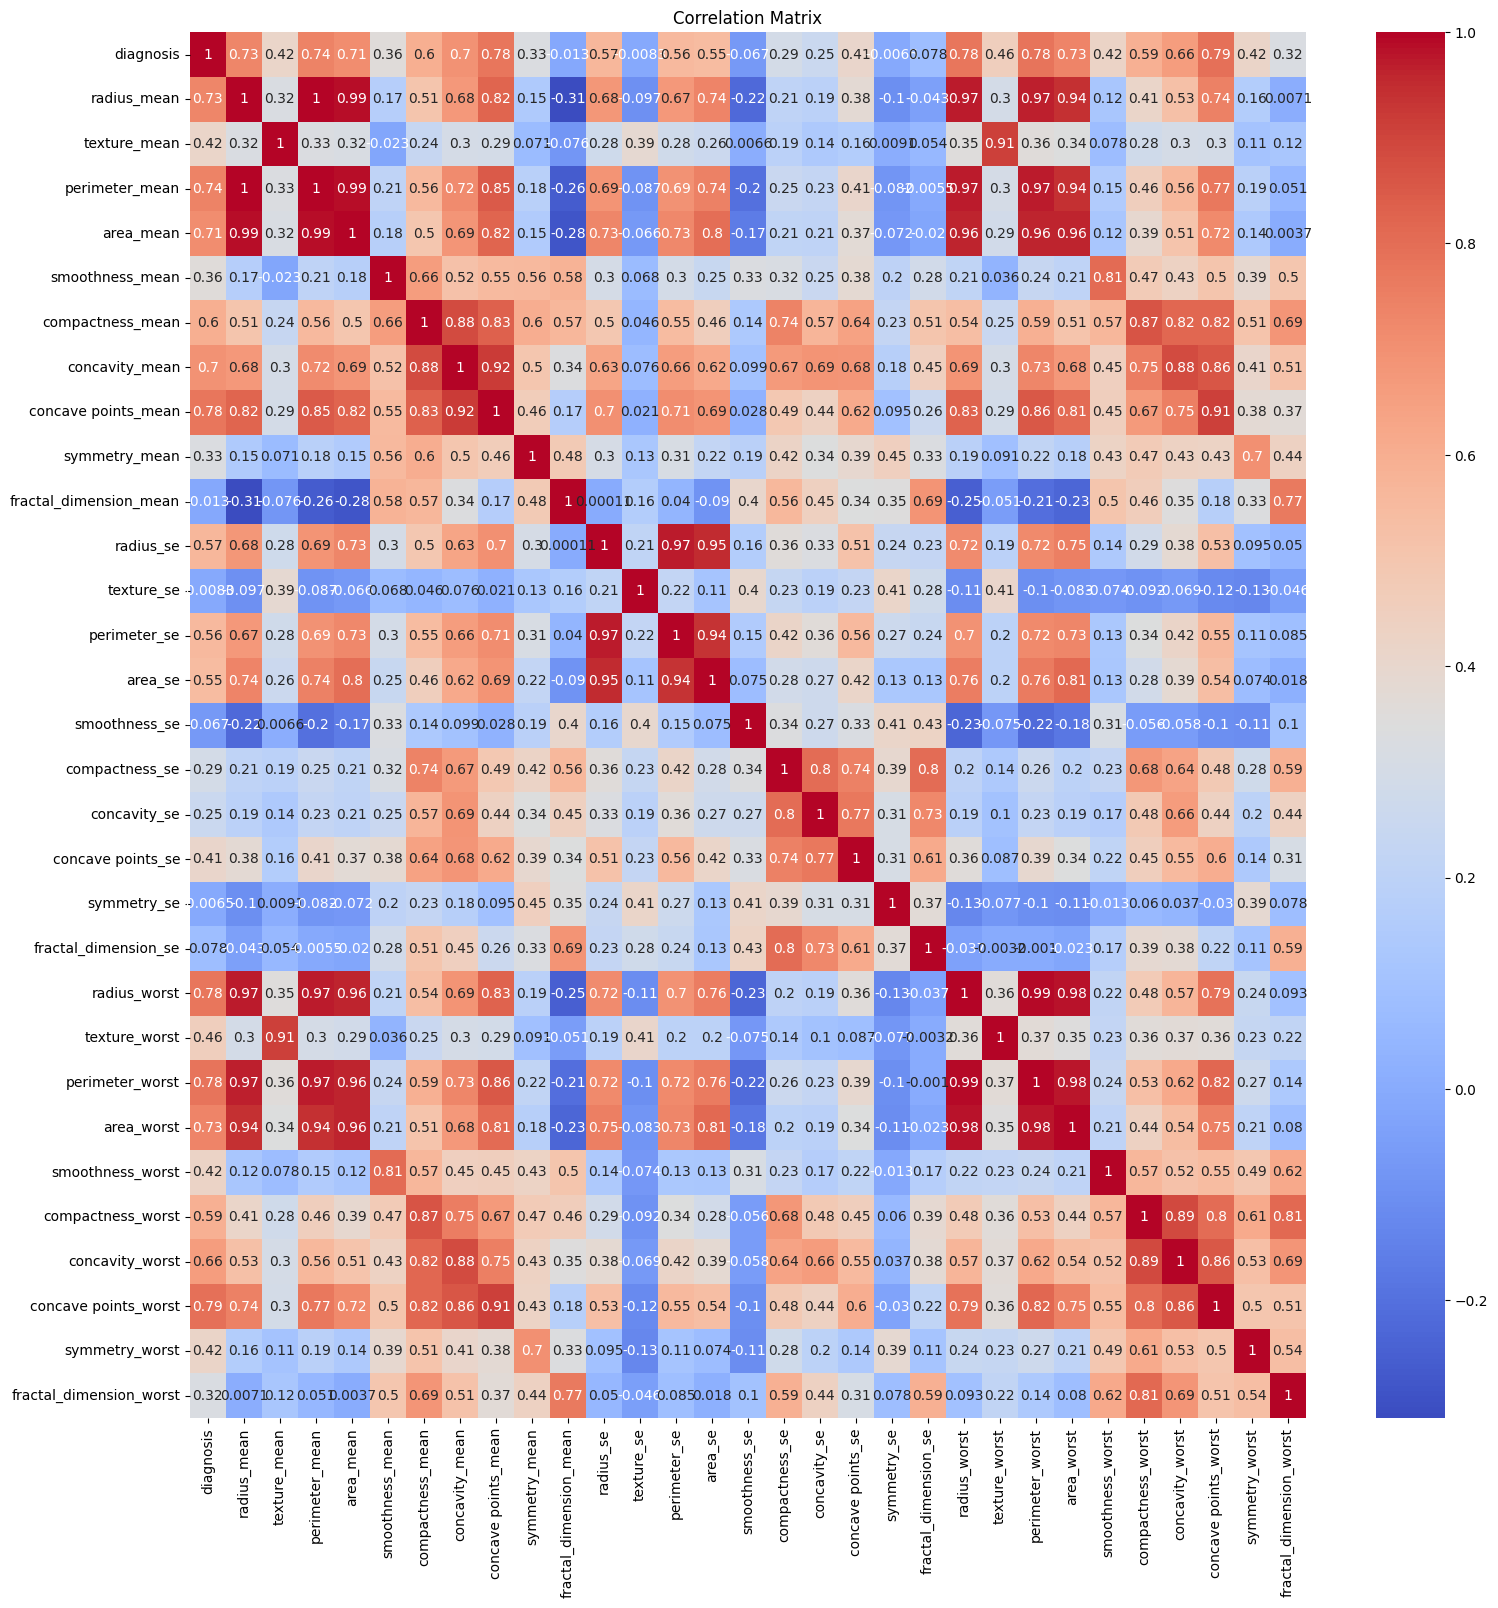

In [ ]:
corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Extract the features with the highest absolute correlation with 'ETP quotidien [mm]'
corr_threshold = 0.6
selected_features = corr.index[np.abs(corr['diagnosis']) >= corr_threshold]

In [ ]:
len(selected_features)

11

In [ ]:
selected_features

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

In [ ]:
new_cancer_data = df[selected_features]

In [ ]:
new_cancer_data.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.4504,0.2430
3,1,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.4000,0.1625


In [ ]:
fig = px.violin(df, y="radius_mean", x="diagnosis", box=True, points="all",title="Violin Plot of Radius mean by Diagnosis")

fig.update_layout(
    title_text="Distribution of Radius Mean by Diagnosis",
    xaxis_title_text="Radius Mean",
    yaxis_title_text="Frequency",
    legend_title_text="Diagnosis"
)
fig.show()

In [ ]:
fig = px.violin(df, y="area_mean", x="diagnosis", box=True, points="all",title="Violin Plot of Area mean by Diagnosis")

fig.update_layout(
    title_text="Distribution of Area Mean by Diagnosis",
    xaxis_title_text="Area Mean",
    yaxis_title_text="Frequency",
    legend_title_text="Diagnosis"
)
fig.show()

In [ ]:
fig = px.violin(df, y="radius_worst", x="diagnosis", box=True, points="all",title="Violin Plot of Radius worst by Diagnosis")

fig.update_layout(
    title_text="Distribution of Radius worst by Diagnosis",
    xaxis_title_text="Radius worst",
    yaxis_title_text="Frequency",
    legend_title_text="Diagnosis"
)
fig.show()

In [ ]:
fig = px.violin(df, y="area_worst", x="diagnosis", box=True, points="all",title="Violin Plot of Area worst by Diagnosis")

fig.update_layout(
    title_text="Distribution of Area worst by Diagnosis",
    xaxis_title_text="Area worst",
    yaxis_title_text="Frequency",
    legend_title_text="Diagnosis"
)
fig.show()

In [ ]:
fig = px.scatter(df, x="radius_mean", y="radius_worst", color="diagnosis",
                  title="Scatter Plot of Radius Mean vs Radius Worst by Diagnosis")

fig.show()

In [ ]:
fig = px.scatter(df, x="area_mean", y="area_worst", color="diagnosis",
                  title="Scatter Plot of Area Mean vs Area Worst by Diagnosis")

fig.show()

In [ ]:
# Create a scatter plot of area vs radius
fig = px.scatter(df, x="radius_mean", y="area_mean", color="diagnosis",
                 title="Area Mean vs Radius Mean")

# Add a trendline to the scatter plot
fig.update_traces(mode="markers+lines")
fig.update_layout(showlegend=True)

# Show the figure
fig.show()

In [ ]:
X = df.drop('diagnosis', axis = 1)

In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = df['diagnosis']

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
KNN_df = pd.DataFrame(columns=['Technique', 'Standardization', 'Best value of k', 'Accuracy'])

In [ ]:
KNN_df

,Technique,Standardization,Best value of k,Accuracy


**Ecludian Distance**

In [ ]:
# Define a function to calculate the Euclidean distance between two points
def euclidean_distance(x1, x2):
    return math.sqrt(np.sum((x1 - x2)**2))

In [ ]:
# Define the KNN function
def knn_euclidean_distance(X_train, y_train, X_test, k):
    # List to store the predicted labels for the test set
    y_pred = []
    
    # Iterate over each point in the test set
    for i in range(len(X_test)):
        distances = []
        # Iterate over each point in the training set
        for j in range(len(X_train)):
            # Calculate the distance between the two points using the Euclidean distance metric
            dist = euclidean_distance(X_test[i], X_train[j])
            distances.append((dist, y_train[j]))
        
        # Sort the distances list by distance (ascending order)
        distances.sort()
        
        # Get the k nearest neighbors
        neighbors = distances[:k]
        
        # Count the votes for each class
        counts = {}
        for neighbor in neighbors:
            label = neighbor[1]
            if label in counts:
                counts[label] += 1
            else:
                counts[label] = 1
        
        # Get the class with the most votes
        max_count = max(counts, key=counts.get)
        y_pred.append(max_count)
    
    return y_pred

In [ ]:
X_train_np = np.array(X_train) 
X_test_np = np.array(X_test)

# Convert y_train and y_test to numpy arrays
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

k_values = list(range(1, 15))
accuracies = []

for k in k_values:
    y_pred = knn_euclidean_distance(X_train_np, y_train_np, X_test_np, k)
    accuracy = accuracy_score(y_test_np, y_pred)
    accuracies.append(accuracy)

# Create a data frame to store k values and accuracies
results_df = pd.DataFrame({'k': k_values, 'Accuracy': accuracies})

# Create the interactive plot using Plotly
fig = px.line(results_df, x='k', y='Accuracy', title='KNN Accuracy for Different k Values', labels={'k': 'k', 'Accuracy': 'Accuracy'})
fig.show()

# Get the best k value
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print("Best k value is:", best_k , "where accuracy is:" ,best_accuracy)

new_row = {
    'Technique': 'knn_euclidean_distance',
    'Standardization': 'None',
    'Best value of k': best_k,
    'Accuracy': best_accuracy
}

# Append the new row to the results_df DataFrame
KNN_df = KNN_df.append(new_row, ignore_index=True)

Best k value is: 11 where accuracy is: 0.9824561403508771


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train and y_test to numpy arrays
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

k_values = list(range(1, 15))
accuracies = []

for k in k_values:
    y_pred = knn_euclidean_distance(X_train_scaled, y_train_np, X_test_scaled, k)
    accuracy = accuracy_score(y_test_np, y_pred)
    accuracies.append(accuracy)

# Create a data frame to store k values and accuracies
results_df = pd.DataFrame({'k': k_values, 'Accuracy': accuracies})

# Create the interactive plot using Plotly
fig = px.line(results_df, x='k', y='Accuracy', title='KNN Accuracy for Different k Values', labels={'k': 'k', 'Accuracy': 'Accuracy'})
fig.show()

# Get the best k value
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print("Best k value is:", best_k , "where accuracy is:" ,best_accuracy)

new_row = {
    'Technique': 'knn_euclidean_distance',
    'Standardization': 'StandardScaler',
    'Best value of k': best_k,
    'Accuracy': best_accuracy
}

# Append the new row to the results_df DataFrame
KNN_df = KNN_df.append(new_row, ignore_index=True)

Best k value is: 9 where accuracy is: 0.9649122807017544


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train and y_test to numpy arrays
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

k_values = list(range(1, 15))
accuracies = []

for k in k_values:
    y_pred = knn_euclidean_distance(X_train_scaled, y_train_np, X_test_scaled, k)
    accuracy = accuracy_score(y_test_np, y_pred)
    accuracies.append(accuracy)

# Create a data frame to store k values and accuracies
results_df = pd.DataFrame({'k': k_values, 'Accuracy': accuracies})

# Create the interactive plot using Plotly
fig = px.line(results_df, x='k', y='Accuracy', title='KNN Accuracy for Different k Values', labels={'k': 'k', 'Accuracy': 'Accuracy'})
fig.show()

# Get the best k value
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print("Best k value is:", best_k , "where accuracy is:" ,best_accuracy)

new_row = {
    'Technique': 'knn_euclidean_distance',
    'Standardization': 'MinMaxScaler',
    'Best value of k': best_k,
    'Accuracy': best_accuracy
}

# Append the new row to the results_df DataFrame
KNN_df = KNN_df.append(new_row, ignore_index=True)

Best k value is: 3 where accuracy is: 0.9649122807017544


**Minkowski distance**

In [ ]:
# Function to calculate the Minkowski distance between two points
def minkowski_distance(x1, x2, p=2):
    return np.power(np.sum(np.power(np.abs(x1 - x2), p)), 1/p)

In [ ]:
# Define the KNN function
def knn_minkowski_distance(X_train, y_train, X_test, k, p=2):
    # List to store the predicted labels for the test set
    y_pred = []
    
    # Iterate over each point in the test set
    for i in range(len(X_test)):
        distances = []
        # Iterate over each point in the training set
        for j in range(len(X_train)):
            # Calculate the distance between the two points using the Minkowski distance metric
            dist = minkowski_distance(X_test[i], X_train[j], p)
            distances.append((dist, y_train[j]))
        
        # Sort the distances list by distance (ascending order)
        distances.sort()
        
        # Get the k nearest neighbors
        neighbors = distances[:k]
        
        # Count the votes for each class
        counts = {}
        for neighbor in neighbors:
            label = neighbor[1]
            if label in counts:
                counts[label] += 1
            else:
                counts[label] = 1
        
        # Get the class with the most votes
        max_count = max(counts, key=counts.get)
        y_pred.append(max_count)
    
    return y_pred

In [ ]:
X_train_np = np.array(X_train) 
X_test_np = np.array(X_test)

# Convert y_train and y_test to numpy arrays
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

# Run the KNN algorithm on the test set for different k and p values
k_values = list(range(1, 15))
p_values = list(range(1, 6))
results = []

for k in k_values:
    for p in p_values:
        y_pred = knn_minkowski_distance(X_train_np, y_train_np, X_test_np, k, p)
        accuracy = accuracy_score(y_test_np, y_pred)
        results.append((k, p, accuracy))

# Create a data frame to store k, p values, and accuracies
results_df = pd.DataFrame(results, columns=['k', 'p', 'Accuracy'])

# Create the 3D plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=results_df['k'],
    y=results_df['p'],
    z=results_df['Accuracy'],
    mode='markers',
    marker=dict(
        size=4,
        color=results_df['Accuracy'],
        colorscale='Viridis',
        showscale=True,
        opacity=0.8
    ),
    text=[f"k={k}, p={p}, Acc={acc:.2f}" for k, p, acc in results]
)])

fig.update_layout(scene=dict(
    xaxis_title='k',
    yaxis_title='p',
    zaxis_title='Accuracy'
))

fig.show()

# Get the best k and p values
best_result = max(results, key=lambda x: x[2])
best_k, best_p, best_accuracy = best_result
print("Best k value:", best_k)
print("Best p value:", best_p)
print("Best accuracy:", best_accuracy)

new_row = {
    'Technique': 'knn_minkowski_distance',
    'Standardization': 'None',
    'Best value of k': best_k,
    'Accuracy': best_accuracy
}

# Append the new row to the results_df DataFrame
KNN_df = KNN_df.append(new_row, ignore_index=True)

Best k value: 11
Best p value: 2
Best accuracy: 0.9824561403508771


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train and y_test to numpy arrays
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

# Run the KNN algorithm on the test set for different k and p values
k_values = list(range(1, 15))
p_values = list(range(1, 6))
results = []

for k in k_values:
    for p in p_values:
        y_pred = knn_minkowski_distance(X_train_scaled, y_train_np, X_test_scaled, k)
        accuracy = accuracy_score(y_test_np, y_pred)
        results.append((k, p, accuracy))

# Create a data frame to store k, p values, and accuracies
results_df = pd.DataFrame(results, columns=['k', 'p', 'Accuracy'])

# Create the 3D plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=results_df['k'],
    y=results_df['p'],
    z=results_df['Accuracy'],
    mode='markers',
    marker=dict(
        size=4,
        color=results_df['Accuracy'],
        colorscale='Viridis',
        showscale=True,
        opacity=0.8
    ),
    text=[f"k={k}, p={p}, Acc={acc:.2f}" for k, p, acc in results]
)])

fig.update_layout(scene=dict(
    xaxis_title='k',
    yaxis_title='p',
    zaxis_title='Accuracy'
))

fig.show()

# Get the best k and p values
best_result = max(results, key=lambda x: x[2])
best_k, best_p, best_accuracy = best_result
print("Best k value:", best_k)
print("Best p value:", best_p)
print("Best accuracy:", best_accuracy)

new_row = {
    'Technique': 'knn_minkowski_distance',
    'Standardization': 'StandardScaler',
    'Best value of k': best_k,
    'Accuracy': best_accuracy
}

# Append the new row to the results_df DataFrame
KNN_df = KNN_df.append(new_row, ignore_index=True)

Best k value: 9
Best p value: 1
Best accuracy: 0.9649122807017544


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train and y_test to numpy arrays
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

# Run the KNN algorithm on the test set for different k and p values
k_values = list(range(1, 15))
p_values = list(range(1, 6))
results = []

for k in k_values:
    for p in p_values:
        y_pred = knn_minkowski_distance(X_train_scaled, y_train_np, X_test_scaled, k)
        accuracy = accuracy_score(y_test_np, y_pred)
        results.append((k, p, accuracy))

# Create a data frame to store k, p values, and accuracies
results_df = pd.DataFrame(results, columns=['k', 'p', 'Accuracy'])

# Create the 3D plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=results_df['k'],
    y=results_df['p'],
    z=results_df['Accuracy'],
    mode='markers',
    marker=dict(
        size=4,
        color=results_df['Accuracy'],
        colorscale='Viridis',
        showscale=True,
        opacity=0.8
    ),
    text=[f"k={k}, p={p}, Acc={acc:.2f}" for k, p, acc in results]
)])

fig.update_layout(scene=dict(
    xaxis_title='k',
    yaxis_title='p',
    zaxis_title='Accuracy'
))

fig.show()

# Get the best k and p values
best_result = max(results, key=lambda x: x[2])
best_k, best_p, best_accuracy = best_result
print("Best k value:", best_k)
print("Best p value:", best_p)
print("Best accuracy:", best_accuracy)

new_row = {
    'Technique': 'knn_minkowski_distance',
    'Standardization': 'MinMaxScaler',
    'Best value of k': best_k,
    'Accuracy': best_accuracy
}

# Append the new row to the results_df DataFrame
KNN_df = KNN_df.append(new_row, ignore_index=True)

Best k value: 3
Best p value: 1
Best accuracy: 0.9649122807017544


**Manhattan Distance**

In [ ]:
# Function to calculate the Manhattan distance between two points
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

In [ ]:
def knn_manhattan_distance(X_train, y_train, X_test, k):
    # List to store the predicted labels for the test set
    y_pred = []
    
    # Iterate over each point in the test set
    for i in range(len(X_test)):
        distances = []
        # Iterate over each point in the training set
        for j in range(len(X_train)):
            # Calculate the distance between the two points using the Manhattan distance metric
            dist = manhattan_distance(X_test[i], X_train[j])
            distances.append((dist, y_train[j]))
        
        # Sort the distances list by distance (ascending order)
        distances.sort()
        
        # Get the k nearest neighbors
        neighbors = distances[:k]
        
        # Count the votes for each class
        counts = {}
        for neighbor in neighbors:
            label = neighbor[1]
            if label in counts:
                counts[label] += 1
            else:
                counts[label] = 1
        
        # Get the class with the most votes
        max_count = max(counts, key=counts.get)
        y_pred.append(max_count)
    
    return y_pred

In [ ]:
X_train_np = np.array(X_train) 
X_test_np = np.array(X_test)

# Convert y_train and y_test to numpy arrays
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

k_values = list(range(1, 15))
accuracies = []

for k in k_values:
    y_pred = knn_manhattan_distance(X_train_np, y_train_np, X_test_np, k)
    accuracy = accuracy_score(y_test_np, y_pred)
    accuracies.append(accuracy)

# Create a data frame to store k values and accuracies
results_df = pd.DataFrame({'k': k_values, 'Accuracy': accuracies})

# Create the interactive plot using Plotly
fig = px.line(results_df, x='k', y='Accuracy', title='KNN Accuracy for Different k Values', labels={'k': 'k', 'Accuracy': 'Accuracy'})
fig.show()

# Get the best k value
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print("Best k value is:", best_k , "where accuracy is:" ,best_accuracy)

new_row = {
    'Technique': 'knn_manhattan_distance',
    'Standardization': 'None',
    'Best value of k': best_k,
    'Accuracy': best_accuracy
}

# Append the new row to the results_df DataFrame
KNN_df = KNN_df.append(new_row, ignore_index=True)

Best k value is: 9 where accuracy is: 0.9649122807017544


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train and y_test to numpy arrays
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

k_values = list(range(1, 15))
accuracies = []

for k in k_values:
    y_pred = knn_manhattan_distance(X_train_scaled, y_train_np, X_test_scaled, k)
    accuracy = accuracy_score(y_test_np, y_pred)
    accuracies.append(accuracy)

# Create a data frame to store k values and accuracies
results_df = pd.DataFrame({'k': k_values, 'Accuracy': accuracies})

# Create the interactive plot using Plotly
fig = px.line(results_df, x='k', y='Accuracy', title='KNN Accuracy for Different k Values', labels={'k': 'k', 'Accuracy': 'Accuracy'})
fig.show()

# Get the best k value
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print("Best k value is:", best_k , "where accuracy is:" ,best_accuracy)

new_row = {
    'Technique': 'knn_manhattan_distance',
    'Standardization': 'StandardScaler',
    'Best value of k': best_k,
    'Accuracy': best_accuracy
}

# Append the new row to the results_df DataFrame
KNN_df = KNN_df.append(new_row, ignore_index=True)

Best k value is: 3 where accuracy is: 0.9649122807017544


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train and y_test to numpy arrays
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

k_values = list(range(1, 15))
accuracies = []

for k in k_values:
    y_pred = knn_manhattan_distance(X_train_scaled, y_train_np, X_test_scaled, k)
    accuracy = accuracy_score(y_test_np, y_pred)
    accuracies.append(accuracy)

# Create a data frame to store k values and accuracies
results_df = pd.DataFrame({'k': k_values, 'Accuracy': accuracies})

# Create the interactive plot using Plotly
fig = px.line(results_df, x='k', y='Accuracy', title='KNN Accuracy for Different k Values', labels={'k': 'k', 'Accuracy': 'Accuracy'})
fig.show()

# Get the best k value
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print("Best k value is:", best_k , "where accuracy is:" ,best_accuracy)

new_row = {
    'Technique': 'knn_manhattan_distance',
    'Standardization': 'MinMaxScaler',
    'Best value of k': best_k,
    'Accuracy': best_accuracy
}

# Append the new row to the results_df DataFrame
KNN_df = KNN_df.append(new_row, ignore_index=True)

Best k value is: 11 where accuracy is: 0.9736842105263158


In [ ]:
KNN_df

,Technique,Standardization,Best value of k,Accuracy
0,knn_euclidean_distance,None,11,0.982456
1,knn_euclidean_distance,StandardScaler,9,0.964912
2,knn_euclidean_distance,MinMaxScaler,3,0.964912
3,knn_minkowski_distance,None,11,0.982456
4,knn_minkowski_distance,StandardScaler,9,0.964912
5,knn_minkowski_distance,MinMaxScaler,3,0.964912
6,knn_manhattan_distance,None,9,0.964912
7,knn_manhattan_distance,StandardScaler,3,0.964912
8,knn_manhattan_distance,MinMaxScaler,11,0.973684


In [ ]:
fig = go.Figure()

# Add bars for each distance technique and scaler
for technique in KNN_df['Technique'].unique():
    for scaler in KNN_df['Standardization'].unique():
        subset_df = KNN_df[(KNN_df['Technique'] == technique) & (KNN_df['Standardization'] == scaler)]
        fig.add_trace(go.Bar(
            x=[f"{technique} ({scaler})"],
            y=subset_df['Accuracy'],
            text=subset_df['Best value of k'],
            textposition='auto',
            name=f"{technique} ({scaler})"
        ))

# Customize the plot layout
fig.update_layout(
    title='KNN Accuracy for Different Distance Techniques and Standardization',
    xaxis_title='Technique (Standardization)',
    yaxis_title='Accuracy',
    showlegend=False,
    plot_bgcolor='rgba(245, 245, 245, 1)',
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        tickangle=45
    ),
    yaxis=dict(
        gridcolor='rgba(128, 128, 128, 0.5)',
        showgrid=True,
        zeroline=False,
        showline=False,
        range=[0.9, 1.0]
    ),
    bargap=0.2
)

fig.show()
